# Duplicate Question Pairing (Quora Dataset)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\SEMESTERS\All_DS Projects\NLP\quora_question_pairs_train.csv")

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [18]:
new_df = df.sample(30000)   # random rows generated

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 367910 to 34881
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30000 non-null  int64  
 1   qid1          30000 non-null  int64  
 2   qid2          30000 non-null  int64  
 3   question1     30000 non-null  object 
 4   question2     29999 non-null  object 
 5   is_duplicate  30000 non-null  int64  
 6   q1_len        30000 non-null  float64
 7   q2_len        29999 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 2.1+ MB


In [20]:
# missing values
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
q1_len          0
q2_len          1
dtype: int64

In [22]:
# duplicate roes
new_df.duplicated().sum()

0

0    19057
1    10943
Name: is_duplicate, dtype: int64
0    63.523333
1    36.476667
Name: is_duplicate, dtype: float64


<Axes: >

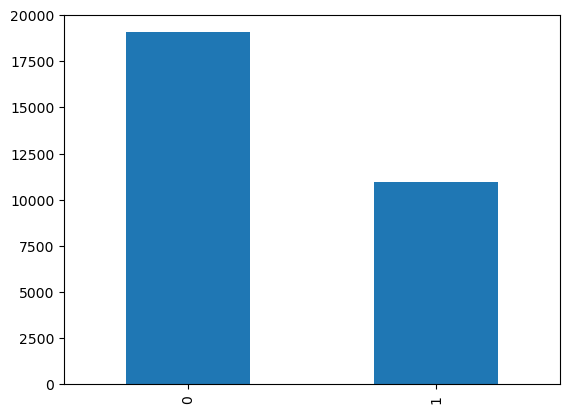

In [23]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [24]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55534
Number of questions getting repeated 3320


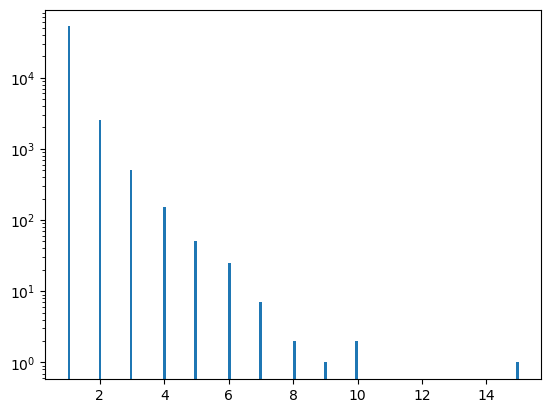

In [25]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [26]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [27]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
367910,367910,498238,498239,Does Facebook really connect friends?,"Should Facebook introduce a ""follow"" type of c...",0,37,104.0
84933,84933,124027,143511,"How did Diana, Princess of Wales, really die?",Did paparazzi kill Princess Diana? Why or why ...,0,45,50.0
361498,361498,491348,491349,Do Electron apps use more resources than they ...,Did Medieval peasants use more calories than t...,0,91,58.0
16126,16126,14709,30760,What is the shortest sentence that has all 26 ...,Why do we use silent letters in some words?,0,78,43.0
283887,283887,44572,404054,What are the best legitimate methods to making...,What is the best way to make money online legi...,1,60,55.0


In [30]:
# Assuming new_df is your DataFrame
new_df['question1'].fillna('', inplace=True)
new_df['question2'].fillna('', inplace=True)

# Calculate the number of words in each question
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
367910,367910,498238,498239,Does Facebook really connect friends?,"Should Facebook introduce a ""follow"" type of c...",0,37,104.0,5,16
84933,84933,124027,143511,"How did Diana, Princess of Wales, really die?",Did paparazzi kill Princess Diana? Why or why ...,0,45,50.0,8,9
361498,361498,491348,491349,Do Electron apps use more resources than they ...,Did Medieval peasants use more calories than t...,0,91,58.0,15,10
16126,16126,14709,30760,What is the shortest sentence that has all 26 ...,Why do we use silent letters in some words?,0,78,43.0,14,9
283887,283887,44572,404054,What are the best legitimate methods to making...,What is the best way to make money online legi...,1,60,55.0,10,10


In [31]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [33]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
367910,367910,498238,498239,Does Facebook really connect friends?,"Should Facebook introduce a ""follow"" type of c...",0,37,104.0,5,16,1
84933,84933,124027,143511,"How did Diana, Princess of Wales, really die?",Did paparazzi kill Princess Diana? Why or why ...,0,45,50.0,8,9,2
361498,361498,491348,491349,Do Electron apps use more resources than they ...,Did Medieval peasants use more calories than t...,0,91,58.0,15,10,4
16126,16126,14709,30760,What is the shortest sentence that has all 26 ...,Why do we use silent letters in some words?,0,78,43.0,14,9,2
283887,283887,44572,404054,What are the best legitimate methods to making...,What is the best way to make money online legi...,1,60,55.0,10,10,5


In [34]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [35]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
367910,367910,498238,498239,Does Facebook really connect friends?,"Should Facebook introduce a ""follow"" type of c...",0,37,104.0,5,16,1,19
84933,84933,124027,143511,"How did Diana, Princess of Wales, really die?",Did paparazzi kill Princess Diana? Why or why ...,0,45,50.0,8,9,2,16
361498,361498,491348,491349,Do Electron apps use more resources than they ...,Did Medieval peasants use more calories than t...,0,91,58.0,15,10,4,25
16126,16126,14709,30760,What is the shortest sentence that has all 26 ...,Why do we use silent letters in some words?,0,78,43.0,14,9,2,22
283887,283887,44572,404054,What are the best legitimate methods to making...,What is the best way to make money online legi...,1,60,55.0,10,10,5,20


In [36]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
367910,367910,498238,498239,Does Facebook really connect friends?,"Should Facebook introduce a ""follow"" type of c...",0,37,104.0,5,16,1,19,0.05
84933,84933,124027,143511,"How did Diana, Princess of Wales, really die?",Did paparazzi kill Princess Diana? Why or why ...,0,45,50.0,8,9,2,16,0.12
361498,361498,491348,491349,Do Electron apps use more resources than they ...,Did Medieval peasants use more calories than t...,0,91,58.0,15,10,4,25,0.16
16126,16126,14709,30760,What is the shortest sentence that has all 26 ...,Why do we use silent letters in some words?,0,78,43.0,14,9,2,22,0.09
283887,283887,44572,404054,What are the best legitimate methods to making...,What is the best way to make money online legi...,1,60,55.0,10,10,5,20,0.25


minimum characters 4
maximum characters 354
average num of characters 59


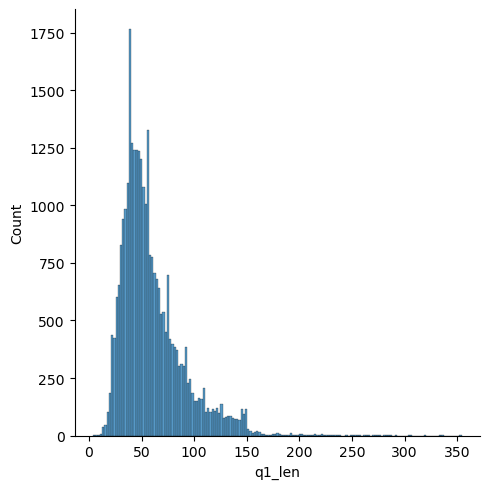

In [37]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 3.0
maximum characters 1151.0
average num of characters 60


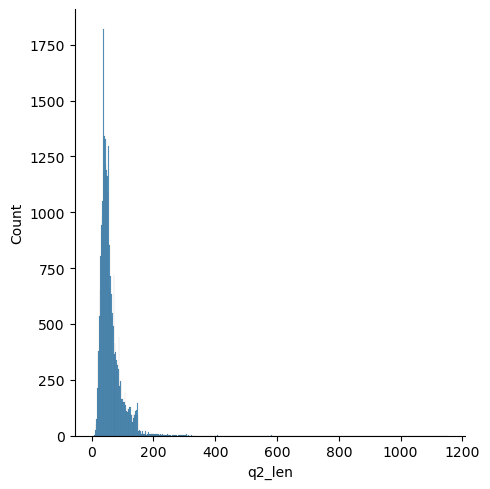

In [38]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 73
average num of words 10


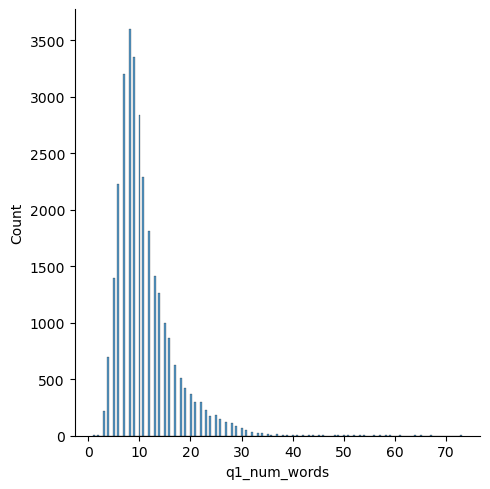

In [39]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


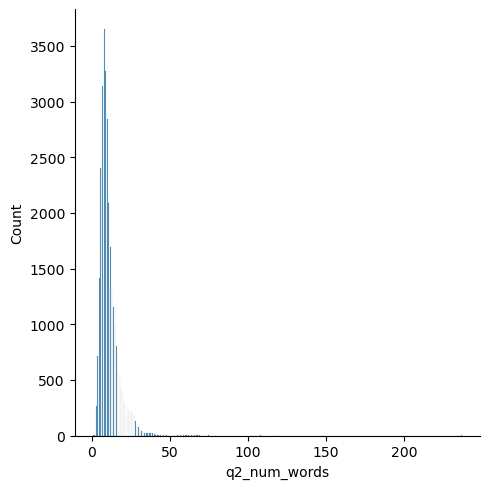

In [40]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

C:\Users\Dell\AppData\Local\Temp\ipykernel_21120\2492214095.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
C:\Users\Dell\AppData\Local\Temp\ipykernel_21120\2492214095.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

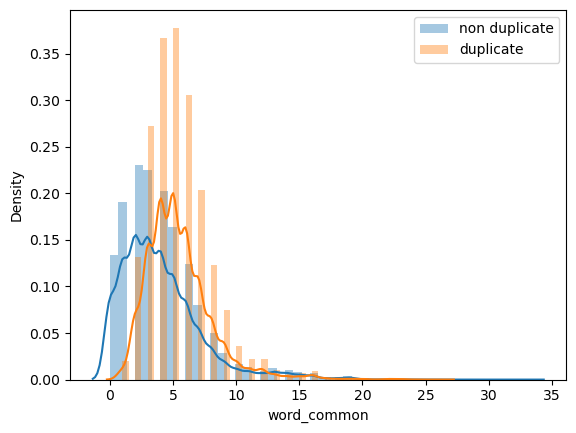

In [41]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_21120\2776808923.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
C:\Users\Dell\AppData\Local\Temp\ipykernel_21120\2776808923.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

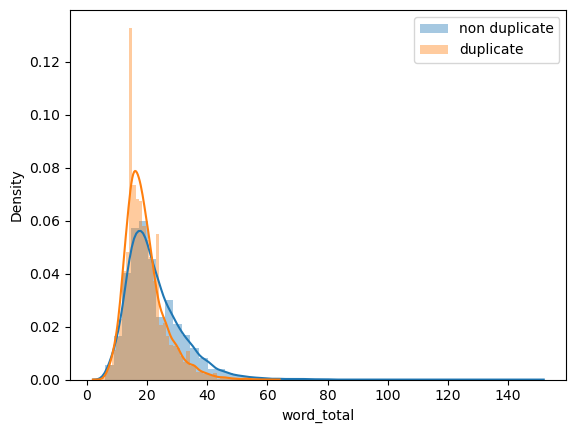

In [42]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_21120\542246512.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
C:\Users\Dell\AppData\Local\Temp\ipykernel_21120\542246512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n

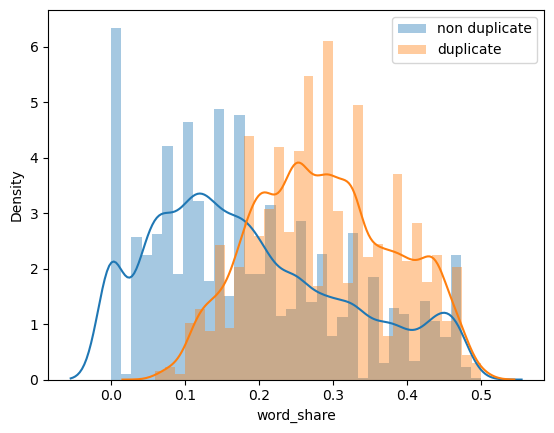

In [43]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [44]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
367910,Does Facebook really connect friends?,"Should Facebook introduce a ""follow"" type of c..."
84933,"How did Diana, Princess of Wales, really die?",Did paparazzi kill Princess Diana? Why or why ...
361498,Do Electron apps use more resources than they ...,Did Medieval peasants use more calories than t...
16126,What is the shortest sentence that has all 26 ...,Why do we use silent letters in some words?
283887,What are the best legitimate methods to making...,What is the best way to make money online legi...


In [45]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
367910,0,37,104.0,5,16,1,19,0.05
84933,0,45,50.0,8,9,2,16,0.12
361498,0,91,58.0,15,10,4,25,0.16
16126,0,78,43.0,14,9,2,22,0.09
283887,1,60,55.0,10,10,5,20,0.25


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [47]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [48]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
367910,0,37,104.0,5,16,1,19,0.05,0,0,...,0,0,0,0,0,0,0,0,0,0
84933,0,45,50.0,8,9,2,16,0.12,0,0,...,0,0,0,0,0,0,0,0,0,0
361498,0,91,58.0,15,10,4,25,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0
16126,0,78,43.0,14,9,2,22,0.09,0,0,...,0,0,0,0,0,0,0,0,0,0
283887,1,60,55.0,10,10,5,20,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Instantiate a SimpleImputer with a strategy to handle missing values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Instantiate and train the RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_imputed, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test_imputed)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)


In [52]:
print("Accuracy:", accuracy)


Accuracy: 0.7586666666666667


In [54]:
pip install xgboost


     ---------------------------------------- 99.8/99.8 MB 4.9 MB/s eta 0:00:00


In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7606666666666667

#### Advanced Features
###### 1. Token Features
- cwc_min: This is the ratio of the number of common words to the length of the smaller question
- cwc_max: This is the ratio of the number of common words to the length of the larger question
- csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
- ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
- ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
- last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
- first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

###### 2. Length Based Features

- mean_len: Mean of the length of the two questions (number of words)
- abs_len_diff: Absolute difference between the length of the two questions (number of words)
- longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question

###### 3. Fuzzy Features
- fuzz_ratio: fuzz_ratio score from fuzzywuzzy
- fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
- token_sort_ratio: token_sort_ratio from fuzzywuzzy
- token_set_ratio: token_set_ratio from fuzzywuzzy